In [11]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import gmaps
import gmaps.datasets 
import os
import seaborn as sns
import seaborn as sb
from config import gkey
import matplotlib.colors as mc

gmaps.configure(api_key=gkey)


In [12]:
for_plotting = pd.read_csv('Fire.csv')
for_plotting

for_plotting['BATTALION']=for_plotting['BATTALION'].replace({
    "2B":"2",
    "2C":"2",
    "3C":"3",
    "4C":"4",
    "5B":"5",
    "6A":"6",
    "7A":"7",
    "7B":"7",
    "7B`":"7",
    "8B":"8",
    "8C":"8",
    "9A":"9",
    "9C":"9"   
})
for_plotting

# for_plotting=for_plotting.dropna()
for_plotting['BATTALION'].unique()



array([6, 7, 5, 2, 9, 8, 1, 4, 3], dtype=int64)

In [13]:
for_plotting.to_csv('Fire.csv',index=False)

In [14]:
for_plotting

,ID,DATE,TIME,ZIP,BATTALION,SHIFT,COUNCIL DISTRICT,STRUCTURE TYPE,BUILDING STORIES,CONSTRUCTION,...,TOTAL SAVED,PERCENTAGE LOSS,SPRINKLER SYSTEM,ALARM SYSTEM,ADDRESS,Lat,Lng,TOTAL LOSS,Dist to 1st Station (mi),Dist to 2nd Station (mi)
0,17961.0,10/29/2019,8:21 PM,75216.0,6,A,4.0,DWELLING,1.0,WOOD,...,161370,3.01,NaN,NaN,1325 S MARSALIS AVE,32.732107,-96.814783,5000,1.01,1.23
1,17962.0,10/30/2019,3:42 AM,75229.0,7,A,13.0,DWELLING,1.0,WOOD,...,525470,1.87,NaN,NaN,10728 LATHROP DR,32.894248,-96.857108,10000,0.97,1.26
2,17963.0,10/30/2019,10:47 AM,75241.0,5,B,3.0,DWELLING,1.0,WOOD,...,286000,6.54,NaN,NaN,6205 S R L THORNTON SERV,32.694543,-96.824020,20000,1.88,2.06
3,17964.0,10/30/2019,5:32 PM,75243.0,2,B,10.0,DWELLING,1.0,WOOD,...,114710,9.47,NaN,NaN,12044 WILLOWDELL DR,32.913584,-96.764435,12000,0.27,1.43
4,17965.0,10/30/2019,11:03 AM,75212.0,9,B,6.0,DWELLING,1.0,WOOD,...,29000,65.48,NaN,NaN,2212 LAPSLEY ST,32.769986,-96.908816,55000,0.46,2.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
616,18414.0,9/3/2020,2:12 AM,75227.0,8,A,7.0,DWELLING,1.0,WOOD,...,243500,6.70,NO,YES,5024 URBAN AVE,32.783636,-96.694285,17500,0.71,1.65
617,18459.0,9/19/2020,8:49 AM,75214.0,3,C,14.0,APARTMENTS,2.0,WOOD,...,2237763,0.11,NaN,NaN,5307 GASTON AVE,32.803882,-96.765385,2500,0.78,0.97
618,18496.0,9/24/2020,7:11 PM,75243.0,4,B,10.0,APARTMENTS,3.0,WOOD,...,7357630,0.00,YES,NaN,218 W FERRIS BRANCH BLVD,32.903830,-96.726209,200,0.68,1.02
619,18514.0,9/30/2020,7:15 AM,75253.0,8,B,8.0,SHED,1.0,METAL,...,900,40.00,NO,NO,14770 LASATER RD,32.692136,-96.567056,600,2.49,2.61


In [15]:
percentage_loss= for_plotting['PERCENTAGE LOSS']
percentage_loss
percentage_loss.describe()


count    621.000000
mean      11.013011
std       18.784545
min        0.000000
25%        0.080000
50%        1.110000
75%       12.110000
max       94.580000
Name: PERCENTAGE LOSS, dtype: float64

In [16]:
for_plotting['BATTALION'].count()
#average percentloss by batallion
avg_loss_by_battalion=for_plotting.groupby(['BATTALION']).mean()['PERCENTAGE LOSS']
avg_loss_by_battalion

BATTALION
1    14.047705
2     4.122373
3    10.243651
4     6.423684
5    13.121111
6    11.848267
7    11.857234
8    13.867857
9    14.656667
Name: PERCENTAGE LOSS, dtype: float64

In [75]:
#create a list for colors to index into for future use
color_list=[(0,1,0),(0,0,.99),(1,0,0),(1,.64,0),(1,.41,.71),"#8601AF",(.25,.88,.81),(.59,.29,0),(.5,.5,.5)]
#color_list=(green,blue,red,orange,pink, violet, turqoise, brown, grey)

In [8]:
unique_battalion=for_plotting[['BATTALION','PERCENTAGE LOSS']]
unique_battalion

unique_battalion=unique_battalion.groupby(['BATTALION']).mean()
unique_battalion=unique_battalion.reset_index()
unique_battalion

# plot avg. loss by battalion on bar chart

x_axis=unique_battalion['BATTALION']
y_axis=unique_battalion['PERCENTAGE LOSS']
plt.xticks(np.arange(0,10,1))
plt.bar(x_axis,y_axis,color=color_list)


plt.xlabel("Batallion")
plt.ylabel("Average % Value Loss in Fires")
plt.title("Average % Value Loss in Fires by Battalion")

plt.show()




BATTALION          621
PERCENTAGE LOSS    621
dtype: int64

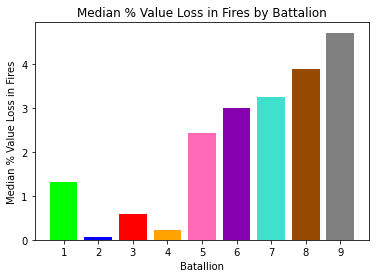

In [81]:
#median of Value % loss in fires by battalion
#median percent value loss by batallion
median_loss_by_battalion=for_plotting.groupby(['BATTALION']).median()
median_loss_by_battalion=median_loss_by_battalion.reset_index()
median_loss_by_battalion

x_axis=median_loss_by_battalion['BATTALION']
y_axis=median_loss_by_battalion['PERCENTAGE LOSS']

plt.xticks(np.arange(0,10,1))
plt.bar(x_axis,y_axis,color=color_list)

plt.xlabel("Batallion")
plt.ylabel("Median % Value Loss in Fires")
plt.title("Median % Value Loss in Fires by Battalion")
plt.show()


In [20]:
#count of each fires by battalion
count_by_battalion=for_plotting.groupby(['BATTALION'])
count_by_battalion['ID'].count()


BATTALION
1    61
2    59
3    63
4    95
5    80
6    75
7    47
8    98
9    42
Name: ID, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

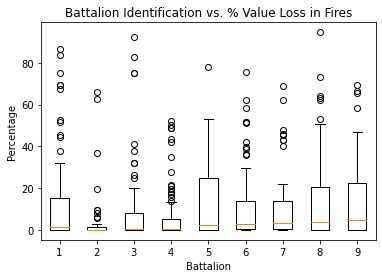

In [111]:
#Box Plot for above data. Define the columns that we want for each battalion and its respective array of Percentage Loss

b1_percentloss=for_plotting.loc[for_plotting['BATTALION']=="1"]
b1_percentloss_list=b1_percentloss['PERCENTAGE LOSS']
b1_percentloss_list

b2_percentloss=for_plotting.loc[for_plotting['BATTALION']=="2"]
b2_percentloss_list=b2_percentloss['PERCENTAGE LOSS']
b2_percentloss_list

b3_percentloss=for_plotting.loc[for_plotting['BATTALION']=="3"]
b3_percentloss_list=b3_percentloss['PERCENTAGE LOSS']
b3_percentloss_list

b4_percentloss=for_plotting.loc[for_plotting['BATTALION']=="4"]
b4_percentloss_list=b4_percentloss['PERCENTAGE LOSS']
b4_percentloss_list

b5_percentloss=for_plotting.loc[for_plotting['BATTALION']=="5"]
b5_percentloss_list=b5_percentloss['PERCENTAGE LOSS']
b5_percentloss_list

b6_percentloss=for_plotting.loc[for_plotting['BATTALION']=="6"]
b6_percentloss_list=b6_percentloss['PERCENTAGE LOSS']
b6_percentloss_list

b7_percentloss=for_plotting.loc[for_plotting['BATTALION']=="7"]
b7_percentloss_list=b7_percentloss['PERCENTAGE LOSS']
b7_percentloss_list

b8_percentloss=for_plotting.loc[for_plotting['BATTALION']=="8"]
b8_percentloss_list=b8_percentloss['PERCENTAGE LOSS']
b8_percentloss_list

b9_percentloss=for_plotting.loc[for_plotting['BATTALION']=="9"]
b9_percentloss_list=b9_percentloss['PERCENTAGE LOSS']
b9_percentloss_list

columns=[b1_percentloss_list,b2_percentloss_list,b3_percentloss_list,b4_percentloss_list,b5_percentloss_list,
        b6_percentloss_list,b7_percentloss_list,b8_percentloss_list,b9_percentloss_list]  

fig,ax=plt.subplots()
plt.xlabel("Battalion")
plt.ylabel("Percentage")
plt.title("Battalion Identification vs. % Value Loss in Fires")
ax.boxplot(columns)
plt.show


# HEATMAP BASED ON PERCENTAGE LOSS

In [113]:
lat_for_map=for_plotting['Lat'].astype(float)
lat_for_map.astype(float)

lng_for_map=for_plotting['Lng'].astype(float)
lng_for_map.astype(float)

0     -96.814783
1     -96.857108
2     -96.824020
3     -96.764435
4     -96.908816
         ...    
616   -96.694285
617   -96.765385
618   -96.726209
619   -96.567056
620   -96.802091
Name: Lng, Length: 621, dtype: float64

In [114]:

# Store 'Lat' and 'Lng' into  locations 
coordinates = for_plotting[["Lat", "Lng"]]

# Convert Poverty Rate to float and store
# HINT: be sure to handle NaN values
percentage_value_lost = for_plotting["PERCENTAGE LOSS"].astype(float)/100

In [120]:
# Create a Heatmap layer
fig = gmaps.figure()

percentage_loss_heat_layer = gmaps.heatmap_layer(coordinates, weights=percentage_value_lost,
                                 dissipating=False, max_intensity=3.5, point_radius=0.02)

fig.add_layer(percentage_loss_heat_layer)

fig

Figure(layout=FigureLayout(height='420px'))

# HEATMAP BASED ON TOTAL LOSS

In [118]:
# tot_val=for_plotting['TOTAL VALUE']
# total_saved=for_plotting['TOTAL SAVED']
# total_loss=tot_val-total_saved
# total_loss.astype(float)

total_loss=for_plotting['TOTAL LOSS']
total_loss.astype(float)


# Store 'Lat' and 'Lng' into  locations 
location = for_plotting[["Lat", "Lng"]].astype(float)

total_loss= total_loss.astype(float)/100

fig = gmaps.figure()

heat_layer = gmaps.heatmap_layer(location, weights=total_loss,
                                 dissipating=False, max_intensity=0.9, point_radius=0.0365)

fig.add_layer(heat_layer)

fig    






Figure(layout=FigureLayout(height='420px'))

In [ ]:
# explore_more_data=pd.read_csv ('Fire.csv')
# explore_more_data

# MAP PINPOINTING ALL FIRES


In [91]:

lat_for_map=for_plotting['Lat']
lat_for_map

lng_for_map=for_plotting['Lng']
lng_for_map

lat_for_map
lng_for_map

0     -96.814783
1     -96.857108
2     -96.824020
3     -96.764435
4     -96.908816
         ...    
616   -96.694285
617   -96.765385
618   -96.726209
619   -96.567056
620   -96.802091
Name: Lng, Length: 621, dtype: float64

# PLOT ALL FIRES IN OUR DATASET

In [122]:
fires_df=for_plotting[['Lat','Lng']]


fires_layer=gmaps.symbol_layer(fires_df,fill_color=(255,165,0),stroke_color=(0,0,0),scale=2)
fig=gmaps.figure()
fig.add_layer(fires_layer)
fig

Figure(layout=FigureLayout(height='420px'))

# PLOT ALL FIRES BY BATTALION THAT RESPONDED


In [117]:
b1_fires_responded=for_plotting.loc[for_plotting['BATTALION']=="1"]
b1_fires_layer=b1_fires_responded[['Lat','Lng']]

b2_fires_responded=for_plotting.loc[for_plotting['BATTALION']=="2"]
b2_fires_layer=b2_fires_responded[['Lat','Lng']]

b3_fires_responded=for_plotting.loc[for_plotting['BATTALION']=="3"]
b3_fires_layer=b3_fires_responded[['Lat','Lng']]

b4_fires_responded=for_plotting.loc[for_plotting['BATTALION']=="4"]
b4_fires_layer=b4_fires_responded[['Lat','Lng']]

b5_fires_responded=for_plotting.loc[for_plotting['BATTALION']=="5"]
b5_fires_layer=b5_fires_responded[['Lat','Lng']]

b6_fires_responded=for_plotting.loc[for_plotting['BATTALION']=="6"]
b6_fires_layer=b6_fires_responded[['Lat','Lng']]

b7_fires_responded=for_plotting.loc[for_plotting['BATTALION']=="7"]
b7_fires_layer=b7_fires_responded[['Lat','Lng']]

b8_fires_responded=for_plotting.loc[for_plotting['BATTALION']=="8"]
b8_fires_layer=b8_fires_responded[['Lat','Lng']]

b9_fires_responded=for_plotting.loc[for_plotting['BATTALION']=="9"]
b9_fires_layer=b9_fires_responded[['Lat','Lng']]

b1_layer=gmaps.symbol_layer(b1_fires_layer,fill_color=(0,255,0),stroke_color=(0,255,0),scale=2)    #GREEN
b2_layer=gmaps.symbol_layer(b2_fires_layer,fill_color=(0,0,254),stroke_color=(0,0,254),scale=2)    #BLUE
b3_layer=gmaps.symbol_layer(b3_fires_layer,fill_color=(255,0,0),stroke_color=(255,0,0),scale=2)    #RED
b4_layer=gmaps.symbol_layer(b4_fires_layer,fill_color=(255,165,0),stroke_color=(255,165,0),scale=2)  #ORANGE
b5_layer=gmaps.symbol_layer(b5_fires_layer,fill_color=(255,105,180),stroke_color=(255,105,180),scale=2)   #PINK
b6_layer=gmaps.symbol_layer(b6_fires_layer,fill_color=(134,1,175),stroke_color=(134,1,175),scale=2)     #VIOLET
b7_layer=gmaps.symbol_layer(b7_fires_layer,fill_color=(64,224,208),stroke_color=(64,224,208),scale=2)   #TURQOISE
b8_layer=gmaps.symbol_layer(b8_fires_layer,fill_color=(150,75,0),stroke_color=(150,75,0),scale=2)    #BROWN
b9_layer=gmaps.symbol_layer(b9_fires_layer,fill_color=(128,128,128),stroke_color=(128,128,128),scale=2)    #GREY

#create legend

fig=gmaps.figure()
fig.add_layer(b1_layer)
fig.add_layer(b2_layer)
fig.add_layer(b3_layer)
fig.add_layer(b4_layer)
fig.add_layer(b5_layer)
fig.add_layer(b6_layer)
fig.add_layer(b7_layer)
fig.add_layer(b8_layer)
fig.add_layer(b9_layer)

fig




Figure(layout=FigureLayout(height='420px'))